Fase 1: Exploración y Limpieza

Exploración inicial:

- Realiza una exploración de los datos para identificar posibles problemas, como valores nulos, atipicos o datos faltantes en las columnas relevantes

- Utiliza funciones de Pandas para obtener información sobre la estructura de los datos , la presencia de valores nulos y estadísticas básicas de las columnas involucradas

- Une los dos conjuntos de datos de la manera más eficiente


Limpieza de datos:

- Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos están completos.

- Verifica la consistencia y correción de los datos para asegurarte de que los datos se presenten de forma coherente.

- Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo cambiar tipo de datos) para garantizar la adecuacion de los datos para el analisis estadístico.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Librerias para imputar nulos
# ------------------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Cargar las bases de datos:

df_flight_activity = pd.read_csv("Customer_Flight_Activity.csv")
df_flight_activity.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


In [3]:
df_loyalty_history = pd.read_csv("Customer_Loyalty_History.csv")
df_loyalty_history.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [4]:
## Exploración básica de los dataset a través de la funcion:

def exploracion_df(data):
    print('------------------------------------------')
    print(data.head())
    print('------------------------------------------')
    print(data.columns)
    print('------------------------------------------')
    print(data.shape)

In [5]:
# para el dataset 1

data = df_flight_activity

exploracion_df(data)

------------------------------------------
   Loyalty Number  Year  Month  Flights Booked  Flights with Companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   Total Flights  Distance  Points Accumulated  Points Redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   Dollar Cost Points Redeemed  
0                            0  
1                            0  
2   

In [6]:
# para el dataset 2

data = df_loyalty_history

exploracion_df(data)

------------------------------------------
   Loyalty Number Country          Province       City Postal Code  Gender  \
0          480934  Canada           Ontario    Toronto     M2Z 4K1  Female   
1          549612  Canada           Alberta   Edmonton     T3G 6Y6    Male   
2          429460  Canada  British Columbia  Vancouver     V6E 3D9    Male   
3          608370  Canada           Ontario    Toronto     P1W 1K4    Male   
4          530508  Canada            Quebec       Hull     J8Y 3Z5    Male   

  Education    Salary Marital Status Loyalty Card      CLV Enrollment Type  \
0  Bachelor   83236.0        Married         Star  3839.14        Standard   
1   College       NaN       Divorced         Star  3839.61        Standard   
2   College       NaN         Single         Star  3839.75        Standard   
3   College       NaN         Single         Star  3839.75        Standard   
4  Bachelor  103495.0        Married         Star  3842.79        Standard   

   Enrollment Year 

In [7]:
df_flight_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB


In [8]:
df_flight_activity.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


In [9]:
df_loyalty_history.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [10]:
df_loyalty_history.describe()

,Loyalty Number,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,16737.000000,12499.000000,16737.000000,16737.000000,16737.000000,2067.000000,2067.000000
mean,549735.880445,79245.609409,7988.896536,2015.253211,6.669116,2016.503145,6.962748
std,258912.132453,35008.297285,6860.982280,1.979111,3.398958,1.380743,3.455297
min,100018.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326603.000000,59246.500000,3980.840000,2014.000000,4.000000,2016.000000,4.000000
50%,550434.000000,73455.000000,5780.180000,2015.000000,7.000000,2017.000000,7.000000
75%,772019.000000,88517.500000,8940.580000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


Informacion relevante sobre los datos:

- el primer df (df_flight_activity) NO tiene nulos y todas las columnas coinciden con el tipo de dato
- el segundo df (df_loyalty_history) SI tiene nulos (salary, cancellation Year y cancellation Month) y llama atencion valor negativo de Salary en el valor min, que es un error porque no puede ser negativo y podría dar problemas luego en el análisis

In [11]:
df_flight_activity.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')

In [12]:
df_loyalty_history.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [13]:
## Unimos todos los datos en un único df para trabajar con el a partir de ahora, elijo hacer merge porque tienen columna en común: "loyalty_number" por lo que tiene sentido agrupar los datos usando esa referencia

df_unido_merge = df_flight_activity.merge(df_loyalty_history, left_on = 'Loyalty Number', right_on = 'Loyalty Number')
df_unido_merge.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [14]:
## Ahora exploro datos generales del nuevo df

In [15]:
df_unido_merge.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Salary', 'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month'],
      dtype='object')

In [16]:
df_unido_merge.shape

(405624, 25)

In [17]:
df_unido_merge.tail(10)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
405614,999631,2018,12,11,1,12,2244,224.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,47349.0,Divorced,Star,2572.51,Standard,2014,1,NaN,NaN
405615,999891,2018,10,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405616,999758,2018,12,1,0,1,896,89.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Female,College,NaN,Single,Star,18690.34,Standard,2018,8,NaN,NaN
405617,999891,2018,11,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405618,999891,2018,12,0,0,0,0,0.0,0,0,Canada,Nova Scotia,Halifax,B3J 9S2,Female,Bachelor,75616.0,Married,Nova,3745.37,Standard,2016,5,2017.0,1.0
405619,999902,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Married,Aurora,7290.07,Standard,2014,5,NaN,NaN
405620,999911,2018,12,0,0,0,0,0.0,0,0,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,217943.0,Single,Nova,8564.77,Standard,2012,8,NaN,NaN
405621,999940,2018,12,3,0,3,1233,123.0,0,0,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,47670.0,Married,Nova,20266.50,Standard,2017,7,NaN,NaN
405622,999982,2018,12,0,0,0,0,0.0,0,0,Canada,British Columbia,Victoria,V10 6T5,Male,College,NaN,Married,Star,2631.56,Standard,2018,7,NaN,NaN
405623,999986,2018,12,0,0,0,0,0.0,0,0,Canada,Ontario,Ottawa,K1F 2R2,Female,Bachelor,46594.0,Married,Nova,8257.01,2018 Promotion,2018,2,NaN,NaN


In [18]:
## Compruebo los nulos que tengo para saber que hacer luego con ellos

df_unido_merge.isnull().sum()

Loyalty Number                      0
Year                                0
Month                               0
Flights Booked                      0
Flights with Companions             0
Total Flights                       0
Distance                            0
Points Accumulated                  0
Points Redeemed                     0
Dollar Cost Points Redeemed         0
Country                             0
Province                            0
City                                0
Postal Code                         0
Gender                              0
Education                           0
Salary                         102672
Marital Status                      0
Loyalty Card                        0
CLV                                 0
Enrollment Type                     0
Enrollment Year                     0
Enrollment Month                    0
Cancellation Year              355560
Cancellation Month             355560
dtype: int64

In [19]:
df_unido_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [20]:
df_unido_merge.describe()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary,CLV,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,302952.000000,405624.000000,405624.000000,405624.000000,50064.000000,50064.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503,79268.825953,7991.976226,2015.252529,6.668008,2016.499521,6.966443
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038,34992.133508,6863.663857,1.979427,3.399766,1.384336,3.448300
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58486.000000,1898.010000,2012.000000,1.000000,2013.000000,1.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59262.000000,3985.320000,2014.000000,4.000000,2016.000000,4.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000,73479.000000,5776.340000,2015.000000,7.000000,2017.000000,7.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000,88612.000000,8936.820000,2017.000000,10.000000,2018.000000,10.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000,407228.000000,83325.380000,2018.000000,12.000000,2018.000000,12.000000


In [21]:
# A simple vista vemos que hay al menos un error en los datos, porque hay por lo menos un salario negativo (el mínimo)
# Lo revisamos

df_unido_merge["Salary"].min()

-58486.0

In [22]:
## quiero ver cuantos valores negativos hay en Salary en total:

df_valores_menor_0 = df_unido_merge[df_unido_merge['Salary'] < 0]
df_valores_menor_0["Salary"].value_counts()

Salary
-10605.0    24
-58486.0    24
-26322.0    24
-12497.0    24
-57297.0    24
-34079.0    24
-46303.0    24
-19332.0    24
-19325.0    24
-49830.0    24
-45962.0    24
-43234.0    24
-17534.0    24
-9081.0     24
-39503.0    24
-47310.0    24
-46683.0    24
-49001.0    24
-31911.0    24
-46470.0    24
Name: count, dtype: int64

In [23]:
df_valores_mayor_0 = df_unido_merge[df_unido_merge['Salary'] > 0]
df_valores_mayor_0["Salary"].value_counts()

Salary
101933.0    552
61809.0     336
62283.0     336
51573.0     336
78573.0     312
           ... 
177400.0     24
60335.0      24
156628.0     24
46008.0      24
56345.0      24
Name: count, Length: 5870, dtype: int64

In [24]:
df_valores_menor_0.shape

(480, 25)

In [25]:
df_valores_mayor_0.shape

(302472, 25)

In [26]:
df_porcentaje_negativos_en_Salary = df_valores_menor_0.shape[0]*100/(df_valores_mayor_0.shape[0] + df_valores_menor_0.shape[0])
df_porcentaje_negativos_en_Salary

0.15844094113919036

In [27]:
## Posible problema con la columna Salary, porque tengo 480 datos negativos, lo cual es un error porque el salario no puede ser negativo.
# Esos 480 datos representan un 0,15% de todos los datos de Salary (excluyendo los nulos). Es un valor bajo.

# Posibles opciones con los datos erroneos:

# - Eliminar los valores negativos: Si los valores negativos no son relevantes para el análisis, puedes filtrarlos y quedarte solo con los valores positivos.
# - Reemplazar los valores negativos: para mantener la misma cantidad de datos, se puede reemplazar los valores negativos por un valor que tenga sentido en tu contexto, como cero o la media de los valores positivos.
# - Crear una nueva columna: Si deseas conservar la información original, podrías crear una nueva columna que contenga solo los valores no negativos, dejando la columna original intacta.
# - Análisis de la causa: Si los valores negativos son inesperados, podría ser útil investigar por qué están presentes. Podrían ser errores de entrada de datos o representar algo significativo que deberías considerar.
# - Imputación: Si decides que los valores negativos son errores y no quieres eliminarlos, podrías considerar técnicas de imputación para estimar valores más apropiados basados en otros datos del dataset

#  Salary es una columna relevante que neceisto para el analisis más adelante, por lo que decido

In [28]:
# Dos posibles opciones con los negativos: 
# - crear una nueva columna de Salary.new (donde solo estarían los valores positivos y los nulos) y trabajar con esta nueva
# - o imputar los valores negativos como nulos, de forma que solo se quedan los positivos y los nulos

#Voy a ver el porcentaje de nulos que tiene de por sí salary y decido

porcentaje_nulos = df_unido_merge.isnull().sum()/df_unido_merge.shape[0]*100
porcentaje_nulos


Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.312112
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [29]:
nulos = porcentaje_nulos[porcentaje_nulos > 0]
nulos.sort_values(ascending=False)

Cancellation Year     87.657535
Cancellation Month    87.657535
Salary                25.312112
dtype: float64

In [30]:
# Conclusion: salary ya tiene un 25.31% de nulos, por lo que añadir 0,16% (lo correspondiente a los 480 datos negativos convertidos en nulos) no afectaría y considero que es la mejor estrategia a seguir

# Voy a reemplazar los valores negativos de Salary por NaN
df_unido_merge['Salary'] = df_unido_merge['Salary'].where(df_unido_merge['Salary'] >= 0, np.nan)

# Verificar el resultado, para saber que la columna Salary sigue siendo tipo float
print(df_unido_merge['Salary'].dtype)  # Esto debería mostrar 'float64'

float64


In [31]:
# Ya veo que el valor minimo no es negativo
df_unido_merge['Salary'].min()

15609.0

In [32]:
## MAS ADELANTE SIGO VIENDO QUE HACER CON TODOS LOS NULOS (además el porcentaje de nulos en salary habrá cambiado levemente al sumarle los nuevos nulos)

In [33]:
## Voy a explorar cada tipo de columna para ver que tipos de datos contienen y tomar decisiones de limpieza o transformacion

In [34]:
## columnas objeto

cols_object=df_unido_merge.select_dtypes(include='object')
cols_object

,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,Enrollment Type
0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,Standard
1,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,Standard
2,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,Standard
3,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,Standard
4,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,Standard
...,...,...,...,...,...,...,...,...,...
405619,Canada,Ontario,Toronto,M1R 4K3,Male,College,Married,Aurora,Standard
405620,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,Single,Nova,Standard
405621,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,Married,Nova,Standard
405622,Canada,British Columbia,Victoria,V10 6T5,Male,College,Married,Star,Standard


In [35]:
for col in df_unido_merge.select_dtypes(include='object'):
    print('-----------------------------')
    print('Para la columna:', col)
    print('-----------------------------')
    print('Los valores unicos son')
    print(df_unido_merge[col].unique())
    print('-----------------------------')
    print('Hay tantos valores:')
    print(df_unido_merge[col].value_counts())

-----------------------------
Para la columna: Country
-----------------------------
Los valores unicos son
['Canada']
-----------------------------
Hay tantos valores:
Country
Canada    405624
Name: count, dtype: int64
-----------------------------
Para la columna: Province
-----------------------------
Los valores unicos son
['Alberta' 'Ontario' 'British Columbia' 'Saskatchewan' 'Quebec'
 'Newfoundland' 'Manitoba' 'New Brunswick' 'Nova Scotia'
 'Prince Edward Island' 'Yukon']
-----------------------------
Hay tantos valores:
Province
Ontario                 130896
British Columbia        106848
Quebec                   79968
Alberta                  23400
Manitoba                 15984
New Brunswick            15432
Nova Scotia              12576
Saskatchewan              9936
Newfoundland              6312
Yukon                     2688
Prince Edward Island      1584
Name: count, dtype: int64
-----------------------------
Para la columna: City
-----------------------------
Los valor

In [36]:
## Conclusion columnas tipo object:
# - Todas las columnas tipo objeto tienen sentido

In [37]:
## columnas int

cols_int = df_unido_merge.select_dtypes(include='int')
cols_int

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Redeemed,Dollar Cost Points Redeemed,Enrollment Year,Enrollment Month
0,100018,2017,1,3,0,3,1521,0,0,2016,8
1,100102,2017,1,10,4,14,2030,0,0,2013,3
2,100140,2017,1,6,0,6,1200,0,0,2016,7
3,100214,2017,1,0,0,0,0,0,0,2015,8
4,100272,2017,1,0,0,0,0,0,0,2014,1
...,...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0,0,2014,5
405620,999911,2018,12,0,0,0,0,0,0,2012,8
405621,999940,2018,12,3,0,3,1233,0,0,2017,7
405622,999982,2018,12,0,0,0,0,0,0,2018,7


In [38]:
for col in df_unido_merge.select_dtypes(include='int'):
    print('-----------------------------')
    print('Para la columna:', col)
    print('-----------------------------')
    print('Los valores unicos son')
    print(df_unido_merge[col].unique())
    print('-----------------------------')
    print('Hay tantos valores:')
    print(df_unido_merge[col].value_counts())

-----------------------------
Para la columna: Loyalty Number
-----------------------------
Los valores unicos son
[100018 100102 100140 ... 999731 999788 999891]
-----------------------------
Hay tantos valores:
Loyalty Number
678205    72
989528    48
373638    48
684889    48
684881    48
          ..
428526    24
428536    24
428565    24
428590    24
999891    24
Name: count, Length: 16737, dtype: int64
-----------------------------
Para la columna: Year
-----------------------------
Los valores unicos son
[2017 2018]
-----------------------------
Hay tantos valores:
Year
2017    202812
2018    202812
Name: count, dtype: int64
-----------------------------
Para la columna: Month
-----------------------------
Los valores unicos son
[ 1  9  2  3 11  4  5  7  6  8 10 12]
-----------------------------
Hay tantos valores:
Month
1     33802
9     33802
2     33802
3     33802
11    33802
4     33802
5     33802
7     33802
6     33802
8     33802
10    33802
12    33802
Name: count, dty

In [39]:
## conclusion columnas tipo int:
# - Creo que hay 4 columnas tipo int (month, year, enrollment year y enrollment month) que tendría más sentido que fueran categóricas
# ya que esto facilitaría el analisis e interpretación de resultados, así como la visualizacion

In [40]:
# Tipo de cada columna antes de aplicar el cambio
df_unido_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [41]:
# Transformacion de estas 4 columnas a catégorias:

df_unido_merge['Year'] = df_unido_merge['Year'].astype('object')
df_unido_merge['Month'] = df_unido_merge['Month'].astype('object')
df_unido_merge['Enrollment Year'] = df_unido_merge['Enrollment Year'].astype('object')
df_unido_merge['Enrollment Month'] = df_unido_merge['Enrollment Month'].astype('object')

In [42]:
## columnas tipo float

cols_float = df_unido_merge.select_dtypes(include='float')
cols_float

,Points Accumulated,Salary,CLV,Cancellation Year,Cancellation Month
0,152.0,92552.0,7919.20,NaN,NaN
1,203.0,NaN,2887.74,NaN,NaN
2,120.0,NaN,2838.07,NaN,NaN
3,0.0,63253.0,4170.57,NaN,NaN
4,0.0,91163.0,6622.05,NaN,NaN
...,...,...,...,...,...
405619,0.0,NaN,7290.07,NaN,NaN
405620,0.0,217943.0,8564.77,NaN,NaN
405621,123.0,47670.0,20266.50,NaN,NaN
405622,0.0,NaN,2631.56,NaN,NaN


In [43]:
for col in df_unido_merge.select_dtypes(include='float'):
    print('-----------------------------')
    print('Para la columna:', col)
    print('-----------------------------')
    print('Los valores unicos son')
    print(df_unido_merge[col].unique())
    print('-----------------------------')
    print('Hay tantos valores:')
    print(df_unido_merge[col].value_counts())

-----------------------------
Para la columna: Points Accumulated
-----------------------------
Los valores unicos son
[152.   203.   120.   ...  18.75 601.   626.  ]
-----------------------------
Hay tantos valores:
Points Accumulated
0.00      197992
180.00       763
270.00       734
288.00       717
189.00       709
           ...  
658.50         1
556.25         1
10.80          1
565.50         1
626.00         1
Name: count, Length: 1549, dtype: int64
-----------------------------
Para la columna: Salary
-----------------------------
Los valores unicos son
[92552.    nan 63253. ... 23160. 97206. 56345.]
-----------------------------
Hay tantos valores:
Salary
101933.0    552
61809.0     336
62283.0     336
51573.0     336
78573.0     312
           ... 
177400.0     24
60335.0      24
156628.0     24
46008.0      24
56345.0      24
Name: count, Length: 5870, dtype: int64
-----------------------------
Para la columna: CLV
-----------------------------
Los valores unicos son
[7919

In [44]:
## Conclusion columnas tipo float:
# - Todas tienen sentido con este tipo de dato, para analisis y visualización posterior

In [45]:
## Com quedan los tipos de columnas después de aplicar la transformación de datos 

df_unido_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  object 
 2   Month                        405624 non-null  object 
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
 10  Country                      405624 non-null  object 
 11  Province                     405624 non-null  object 
 12  City                         405624 non-null  object 
 13 

In [46]:
## ELIMINAMOS NULOS DE LAS 3 COLUMNAS

nuevo_porcentaje_nulos = df_unido_merge.isnull().sum()/df_unido_merge.shape[0]*100
nuevo_porcentaje_nulos

Loyalty Number                  0.000000
Year                            0.000000
Month                           0.000000
Flights Booked                  0.000000
Flights with Companions         0.000000
Total Flights                   0.000000
Distance                        0.000000
Points Accumulated              0.000000
Points Redeemed                 0.000000
Dollar Cost Points Redeemed     0.000000
Country                         0.000000
Province                        0.000000
City                            0.000000
Postal Code                     0.000000
Gender                          0.000000
Education                       0.000000
Salary                         25.430448
Marital Status                  0.000000
Loyalty Card                    0.000000
CLV                             0.000000
Enrollment Type                 0.000000
Enrollment Year                 0.000000
Enrollment Month                0.000000
Cancellation Year              87.657535
Cancellation Mon

In [47]:
nulos_2 = porcentaje_nulos[porcentaje_nulos > 0]
nulos_2.sort_values(ascending=False)

Cancellation Year     87.657535
Cancellation Month    87.657535
Salary                25.312112
dtype: float64

In [48]:
## Tengo por tarto 3 columnas con nulos: Cancellation Year, Cancellation Month y Salary.

## Las tres son de tipo numérica y con alto porcentaje de nulos, por lo que la estrategía a seguir es:
# - IMPUTAR CON TÉCNICAS MÁS AVANZADAS: voy a probar con IterativeImputer y KNNImputer, comparamos recultados y elijo

In [49]:
# como voy a crear columnas nuevas, voy a hacer una copia del DataFrame usando copy()
df_copia = df_unido_merge.copy()
df_copia.head(1)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.2,Standard,2016,8,NaN,NaN


In [50]:
# para las tres columnas con nulos aplico los dos métodos para luego comparar, empiezo por IterativeImputer

imputer_iterative = IterativeImputer(max_iter = 20, random_state = 42)
imputer_iterative_imputado = imputer_iterative.fit_transform(df_copia[["Cancellation Year", "Cancellation Month", "Salary"]])
imputer_iterative_imputado

array([[2.01636936e+03, 6.76758112e+00, 9.25520000e+04],
       [2.01649484e+03, 6.95929965e+00, 7.93721665e+04],
       [2.01649484e+03, 6.95929965e+00, 7.93721665e+04],
       ...,
       [2.01679668e+03, 7.42045086e+00, 4.76700000e+04],
       [2.01649484e+03, 6.95929965e+00, 7.93721665e+04],
       [2.01680693e+03, 7.43610274e+00, 4.65940000e+04]])

In [51]:
# ahora creo las columnas nuevas
df_copia[["Cancellation_year_iterative", "Cancellation_month_iterative", "Salary_iterative"]] = imputer_iterative_imputado

# comprobamos que tengo 0 nulos en las nuevas columnas 
print(f"Después del 'Iterative' tenemos: \n{df_copia[['Cancellation_year_iterative', 'Cancellation_month_iterative', 'Salary_iterative']].isnull().sum()} nulos")

Después del 'Iterative' tenemos: 
Cancellation_year_iterative     0
Cancellation_month_iterative    0
Salary_iterative                0
dtype: int64 nulos


In [52]:
# Ahora utilizamos 'describe()'  para ver si los estadísticos antes y después de la inputación no han cambiado mucho

df_copia.describe()[["Cancellation Year", "Cancellation_year_iterative", "Cancellation Month", "Cancellation_month_iterative", "Salary", "Salary_iterative"]].round(3)

,Cancellation Year,Cancellation_year_iterative,Cancellation Month,Cancellation_month_iterative,Salary,Salary_iterative
count,50064.000,405624.000,50064.000,405624.000,302472.000,405624.000
mean,2016.500,2016.495,6.966,6.959,79451.016,79372.166
std,1.384,0.555,3.448,1.278,34713.919,31014.003
min,2013.000,2013.000,1.000,1.000,15609.000,-742.217
25%,2016.000,2016.438,4.000,6.876,59278.000,63032.000
50%,2017.000,2016.495,7.000,6.959,73523.000,79372.166
75%,2018.000,2016.672,10.000,7.218,88630.000,84015.000
max,2018.000,2018.000,12.000,12.000,407228.000,407228.000


In [53]:
## Al comprobar los datos originales con la columna de datos imputados vemos que en ninguno de los tres cambia mucho ni la media ni la mediana

In [54]:
# he tratado de probar con KNNImputer para comporbar si los resultados daban muy distintos pero al ser un conjunto de datos muy grande el proceso era demasiado lento 

'''imputer_knn = KNNImputer(n_neighbors = 5)
imputer_knn_imputado = imputer_knn.fit_transform(df_copia[["Cancellation Year", "Cancellation Month", "Salary"]])
imputer_knn_imputado'''

'imputer_knn = KNNImputer(n_neighbors = 5)\nimputer_knn_imputado = imputer_knn.fit_transform(df_copia[["Cancellation Year", "Cancellation Month", "Salary"]])\nimputer_knn_imputado'

In [55]:
# Ahora elimino las columnas que ya no interesan (Cancellation Year, Cancellation Month y Salary) y me quedo con las imputadas sin nulos

df_copia.drop(["Salary", "Cancellation Year", "Cancellation Month"], axis = 1, inplace = True)
df_copia.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation_year_iterative,Cancellation_month_iterative,Salary_iterative
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2016.369358,6.767581,92552.000000
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2016.494844,6.959300,79372.166469
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2016.494844,6.959300,79372.166469
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2016.648314,7.193775,63253.000000
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2016.382582,6.787786,91163.000000


In [56]:
# Cambiar el nombre de las columnas que quedaron para que tengan el mismo nombre que las de origen
nuevo_nombre = {"Cancellation_year_iterative": "Cancellation Year",  'Cancellation_month_iterative': "Cancellation Month", "Salary": "pdays"   }
df_copia.rename(columns = nuevo_nombre, inplace = True)

In [57]:
df_copia.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary_iterative
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2016.369358,6.767581,92552.000000
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2016.494844,6.959300,79372.166469
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2016.494844,6.959300,79372.166469
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2016.648314,7.193775,63253.000000
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2016.382582,6.787786,91163.000000


In [58]:
## Compruebo que no tiene ningun nulo
df_copia.isnull().sum()

Loyalty Number                 0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Salary_iterative               0
dtype: int64

In [59]:
## Una vez eliminados los nulos, voy a ver los duplicados

total_duplicados = df_copia.duplicated().sum() 
print(f"Duplicados encontrados: {total_duplicados}")

Duplicados encontrados: 1864


In [60]:
## duplicados por columnas, pero en este caso tiene sentid que haya duplicados en cada columna porque muchos datos son comunes para diferentes registros

for col in df_copia:
    print("para la columna:", col)
    print(df_copia.duplicated(subset = col).sum()) 

para la columna: Loyalty Number
388887
para la columna: Year
405622
para la columna: Month
405612
para la columna: Flights Booked
405602
para la columna: Flights with Companions
405612
para la columna: Total Flights
405591
para la columna: Distance
400878
para la columna: Points Accumulated
404075
para la columna: Points Redeemed
405037
para la columna: Dollar Cost Points Redeemed
405575
para la columna: Country
405623
para la columna: Province
405613
para la columna: City
405595
para la columna: Postal Code
405569
para la columna: Gender
405622
para la columna: Education
405619
para la columna: Marital Status
405621
para la columna: Loyalty Card
405621
para la columna: CLV
397640
para la columna: Enrollment Type
405622
para la columna: Enrollment Year
405617
para la columna: Enrollment Month
405612
para la columna: Cancellation Year
399961
para la columna: Cancellation Month
399955
para la columna: Salary_iterative
399689


In [61]:
# como voy a eliminar duplicados, voy a hacer una copia del DataFrame usando copy()
df_copia_2 = df_copia.copy()
df_copia_2.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary_iterative
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2016.369358,6.767581,92552.000000
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2016.494844,6.959300,79372.166469
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2016.494844,6.959300,79372.166469
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2016.648314,7.193775,63253.000000
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2016.382582,6.787786,91163.000000


In [62]:
## Antes de aplicar drop_duplicates en la copia del df

df_copia_2.shape

(405624, 25)

In [63]:
df_sin_duplicados = df_copia_2.drop_duplicates(keep = False)

In [64]:
df_sin_duplicados.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary_iterative
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2016.369358,6.767581,92552.000000
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2016.494844,6.959300,79372.166469
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2016.494844,6.959300,79372.166469
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2016.648314,7.193775,63253.000000
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2016.382582,6.787786,91163.000000


In [65]:
total_duplicados2 = df_sin_duplicados.duplicated().sum() 
print(f"Duplicados encontrados: {total_duplicados2}")

Duplicados encontrados: 0


In [66]:
df_sin_duplicados.shape

(401912, 25)

In [67]:
df_final = df_sin_duplicados.copy()
df_final.shape

(401912, 25)

In [68]:
## Ya tengo el df final con el que voy a trabajar en las siguientes fases: df_final (sin nulos, sin duplicados y con 
# las columnas preparadas)

Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes
gráficas usando la mejor gráfica que consideres:

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?
2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?
3. ¿Cuál es la distribución de los clientes por provincia o estado?
4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?
5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?
6. ¿Cómo se distribuyen los clientes según su estado civil y género?


In [69]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401912 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               401912 non-null  int64  
 1   Year                         401912 non-null  object 
 2   Month                        401912 non-null  object 
 3   Flights Booked               401912 non-null  int64  
 4   Flights with Companions      401912 non-null  int64  
 5   Total Flights                401912 non-null  int64  
 6   Distance                     401912 non-null  int64  
 7   Points Accumulated           401912 non-null  float64
 8   Points Redeemed              401912 non-null  int64  
 9   Dollar Cost Points Redeemed  401912 non-null  int64  
 10  Country                      401912 non-null  object 
 11  Province                     401912 non-null  object 
 12  City                         401912 non-null  object 
 13  Post

In [70]:
df_final.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Salary_iterative'],
      dtype='object')

In [71]:
df_final.head()

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Salary_iterative
0,100018,2017,1,3,0,3,1521,152.0,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,2016.369358,6.767581,92552.000000
1,100102,2017,1,10,4,14,2030,203.0,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,2016.494844,6.959300,79372.166469
2,100140,2017,1,6,0,6,1200,120.0,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,2016.494844,6.959300,79372.166469
3,100214,2017,1,0,0,0,0,0.0,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,2016.648314,7.193775,63253.000000
4,100272,2017,1,0,0,0,0,0.0,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,2016.382582,6.787786,91163.000000


1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [72]:
# Tengo que combinar vuelos reservados (Flights Booked) por mes (Month) + año (year)

reservas_mes = df_final.groupby('Month')['Flights Booked'].count().reset_index()
reservas_mes

,Month,Flights Booked
0,1,33450
1,2,33452
2,3,33468
3,4,33479
4,5,33479
5,6,33491
6,7,33495
7,8,33509
8,9,33517
9,10,33523


In [73]:
reservas_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Month           12 non-null     int64
 1   Flights Booked  12 non-null     int64
dtypes: int64(2)
memory usage: 324.0 bytes


In [74]:
## También podríamos hacer diferenciacion en el número de reservas por mes y año, pero como de un primer vistazo 
# los datos parecen bastante similares en los meses del año, me quedo con la otra opción

reservas_por_mes_y_año = df_final.groupby(['Month', 'Year'])['Flights Booked'].count().reset_index()
reservas_por_mes_y_año

,Month,Year,Flights Booked
0,1,2017,16694
1,1,2018,16756
2,2,2017,16700
3,2,2018,16752
4,3,2017,16714
5,3,2018,16754
6,4,2017,16714
7,4,2018,16765
8,5,2017,16722
9,5,2018,16757


In [75]:
## Elijo trabajar con reservas_mes y para ello primero cambio datos de Month a object, creo que tiene sentido y así 
# luego para visualizar utilizo combinación de variable numérica y categórica (barplot y boxplot)

reservas_mes['Month'] = reservas_mes['Month'].astype('object') 
reservas_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Month           12 non-null     object
 1   Flights Booked  12 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


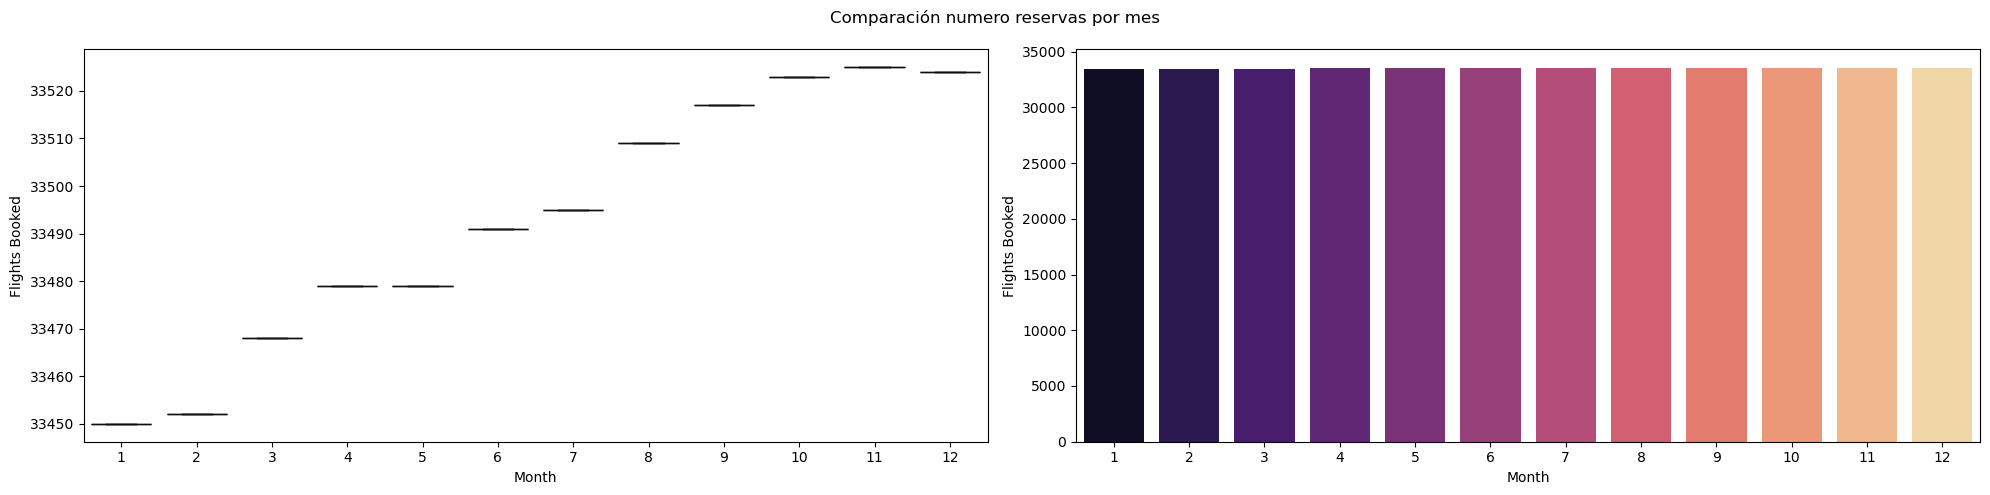

In [76]:
## Vamos a visualizar con un boxplot y barplot

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(x = "Month", 
            y = "Flights Booked", 
            data = reservas_mes, 
            ax = axes[0], 
            palette= "mako")

sns.barplot(x = "Month", 
            y = "Flights Booked", 
            data = reservas_mes,
            ci = None,
            ax = axes[1], 
            palette = "magma")

plt.suptitle("Comparación numero reservas por mes")
plt.tight_layout()

In [210]:
diferencia = (reservas_mes["Flights Booked"].max()) - (reservas_mes["Flights Booked"].min())
print(diferencia)
diferencia_en_porcentaje = (diferencia/reservas_mes["Flights Booked"].max())*100
print("El creciemiento expresado en porcentaje comparando el mes con más ventas y el mes con menos ventas es:", diferencia_en_porcentaje,"%")

75
El creciemiento expresado en porcentaje comparando el mes con más ventas y el mes con menos ventas es: 0.22371364653243847 %


Interpretación final: parece que no hay una gran diferencia en el número de reservas en función del mes, se experimenta un ligero crecimiento a medida que avanza el año pero hablamos de numéros pequeños en comparación con los totales (75 compras más, que representan solo 0,22%). 

Text(0, 0.5, 'Flights Booked')

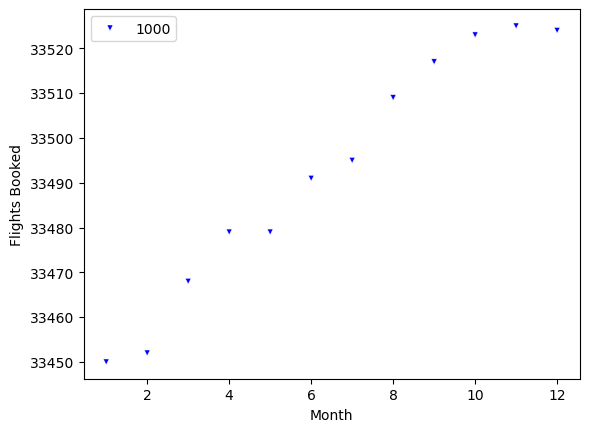

In [78]:
## También se podía hacer sin convertir Month en numérica, a través de Visualización de dos variables numéricas --> Scatterplot
## Pero de la otra manera se aprecia algo mejor los resultados, más completos

sns.scatterplot(x = "Month", 
                y = "Flights Booked", 
                data = reservas_mes, 
                size = 1000, 
                marker= "v",
                color = "blue")

# cambiamos los nombres de los ejes
plt.xlabel("Month")
plt.ylabel("Flights Booked")

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los cliente?

In [79]:
df_final.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Salary_iterative'],
      dtype='object')

In [80]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401912 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               401912 non-null  int64  
 1   Year                         401912 non-null  object 
 2   Month                        401912 non-null  object 
 3   Flights Booked               401912 non-null  int64  
 4   Flights with Companions      401912 non-null  int64  
 5   Total Flights                401912 non-null  int64  
 6   Distance                     401912 non-null  int64  
 7   Points Accumulated           401912 non-null  float64
 8   Points Redeemed              401912 non-null  int64  
 9   Dollar Cost Points Redeemed  401912 non-null  int64  
 10  Country                      401912 non-null  object 
 11  Province                     401912 non-null  object 
 12  City                         401912 non-null  object 
 13  Post

In [81]:
## Tenemos que combinar distancia ("distance") de tipo numérico + puntos acumulados por cliente ("Points Accumulated") de tipo 
# numérico también --> 2 variables numericas --> opciones: scatterplot, regplot para explorar la relación y correlacion entre ellas

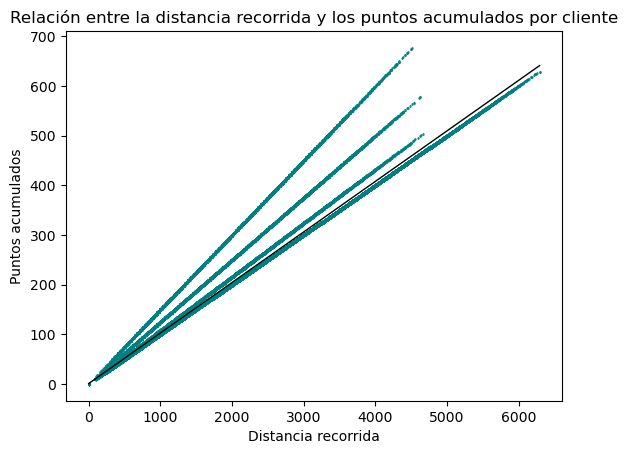

In [82]:
# calculo regplot 

sns.regplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_final, 
            marker = "d", 
            line_kws = {"color": "black", "linewidth": 1}, 
            scatter_kws = {"color": "teal", "s": 1} 
            )

plt.xlabel("Distancia recorrida")
plt.ylabel("Puntos acumulados")
plt.title("Relación entre la distancia recorrida y los puntos acumulados por cliente")
plt.show()

Text(0, 0.5, 'Points Accumulated')

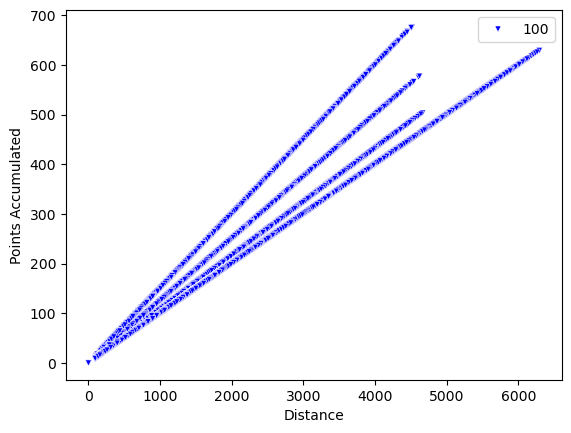

In [83]:
sns.scatterplot(x = "Distance", 
                y = "Points Accumulated", 
                data = df_final, 
                size = 100, 
                marker= "v",
                color = "blue")

# cambiamos los nombres de los ejes
plt.xlabel("Distance")
plt.ylabel("Points Accumulated")

In [84]:
## Los gráficos de visualización parecen mostrar una relación bastante lineal entre ambas columnas, aun así vamos a 
# aplicar coeficiente correlación

print('Correlación Pearson: ', df_final['Distance'].corr(df_final['Points Accumulated'], method='pearson'))

Correlación Pearson:  0.9945277510679301


In [85]:
## Interpretacion: correlación positiva fuerte

Text(0.5, 0, 'Distance')

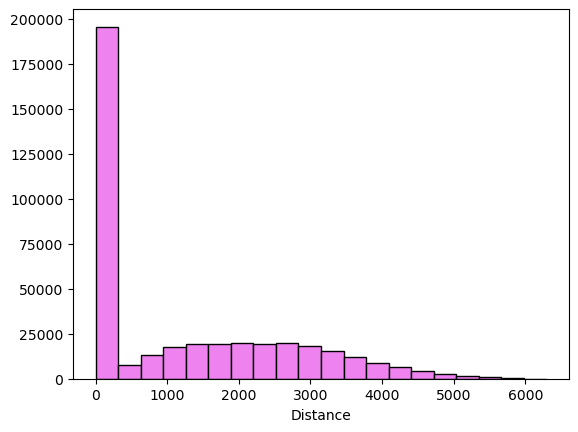

In [86]:
## Para ello antes comprobamos normalidad --> Shapiro y varianza -->

# Gráfico distribución variables distancia y puntos acumulados, visualizando en histograma
# ==============================================================================
plt.hist(x = "Distance", 
         data = df_final, 
         bins = 20, 
         color = "violet", 
         edgecolor = "black")
plt.xlabel("Distance")

Text(0.5, 0, 'Points Accumulated')

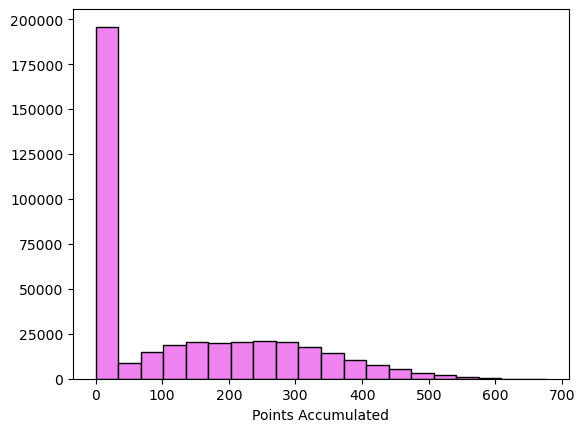

In [87]:
plt.hist(x = "Points Accumulated", 
         data = df_final, 
         bins = 20, 
         color = "violet", 
         edgecolor = "black")
plt.xlabel("Points Accumulated")

In [88]:
### utilizo funcion para comprobar distribucion normal de las variables Distance y Points Accumulated

def check_normalidad(data):
    n = len(data)
    if n <= 5000:
        test_name = "Shapiro-Wilk"
        stat, p_value = shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        stat, p_value = kstest(data, 'norm')
    if p_value > 0.05:
        decision = "No se rechaza H0: Los datos parecen seguir una distribución normal."
    else:
        decision = "Se rechaza H0: Los datos no siguen una distribución normal."
    return {
        "Prueba": test_name,
        "Estadístico": stat,
        "p-value": p_value,
        "Decisión": decision
    }

In [89]:
data = df_final["Distance"]
check_normalidad(data)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5166106013256633,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [90]:
data2 = df_final["Points Accumulated"]
check_normalidad(data2)

{'Prueba': 'Kolmogorov-Smirnov',
 'Estadístico': 0.5166106013256633,
 'p-value': 0.0,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [91]:
## Interpretacion: no siguen una distribucion normal 

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [92]:
df_final.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Salary_iterative'],
      dtype='object')

In [93]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401912 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               401912 non-null  int64  
 1   Year                         401912 non-null  object 
 2   Month                        401912 non-null  object 
 3   Flights Booked               401912 non-null  int64  
 4   Flights with Companions      401912 non-null  int64  
 5   Total Flights                401912 non-null  int64  
 6   Distance                     401912 non-null  int64  
 7   Points Accumulated           401912 non-null  float64
 8   Points Redeemed              401912 non-null  int64  
 9   Dollar Cost Points Redeemed  401912 non-null  int64  
 10  Country                      401912 non-null  object 
 11  Province                     401912 non-null  object 
 12  City                         401912 non-null  object 
 13  Post

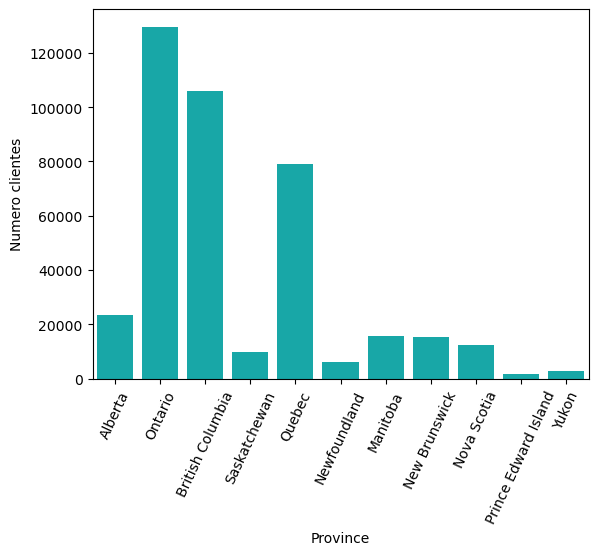

In [94]:
# Province es columnta tipo object, para ver como se distriuye una variable categórica --> countplot

distribucion_provincias = df_final["Province"].value_counts().index
sns.countplot(x="Province", data=df_final, color ='c')
plt.xticks(rotation=65)
plt.xlabel("Province")
plt.ylabel("Numero clientes")
plt.show()

In [95]:
df_final["Province"].value_counts()

Province
Ontario                 129620
British Columbia        106036
Quebec                   79194
Alberta                  23320
Manitoba                 15816
New Brunswick            15272
Nova Scotia              12438
Saskatchewan              9786
Newfoundland              6176
Yukon                     2670
Prince Edward Island      1584
Name: count, dtype: int64

In [175]:
provincias = df_final["Province"].value_counts()
provincias = provincias.to_frame(name='Numero clientes').reset_index()
provincias

,Province,Numero clientes
0,Ontario,129620
1,British Columbia,106036
2,Quebec,79194
3,Alberta,23320
4,Manitoba,15816
5,New Brunswick,15272
6,Nova Scotia,12438
7,Saskatchewan,9786
8,Newfoundland,6176
9,Yukon,2670


In [176]:
total_clientes = provincias["Numero clientes"].sum()
total_clientes

401912

In [177]:
provincias.info()
provincias_mas_clientes = provincias[provincias["Numero clientes"]>50000]
provincias_mas_clientes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Province         11 non-null     object
 1   Numero clientes  11 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


,Province,Numero clientes
0,Ontario,129620
1,British Columbia,106036
2,Quebec,79194


In [204]:
clientes_Ontario = provincias_mas_clientes.iloc[0,1]
print("El total de clientes de Ontario es:", clientes_Ontario)
porcentaje_clientes_Ontario = (clientes_Ontario/total_clientes).round(4)*100
print("El porcentaje de clientes de Ontario respecto al total representa el:", porcentaje_clientes_Ontario,"%")
clientes_British_Columbia = provincias_mas_clientes.iloc[1,1]
print("El total de clientes de British Columbia es:", clientes_British_Columbia)
porcentaje_clientes_British_Columbia = (clientes_British_Columbia/total_clientes).round(4)*100
print("El porcentaje de clientes de British Columbia respecto al total representa el:", porcentaje_clientes_British_Columbia,"%")
clientes_Quebec = provincias_mas_clientes.iloc[2,1]
print("El total de clientes de Quebec es:", clientes_Quebec)
porcentaje_clientes_Quebec = (clientes_Quebec/total_clientes).round(4)*100
print("El porcentaje de clientes de Quebec respecto al total representa el:", porcentaje_clientes_Quebec,"%")

El total de clientes de Ontario es: 129620
El porcentaje de clientes de Ontario respecto al total representa el: 32.25 %
El total de clientes de British Columbia es: 106036
El porcentaje de clientes de British Columbia respecto al total representa el: 26.38 %
El total de clientes de Quebec es: 79194
El porcentaje de clientes de Quebec respecto al total representa el: 19.7 %


Interpretacion: las tres provincias con más numero de clientes son Ontario, British Columbia y Quebec, que agrupan el 60,60% del total de los clientes (32,25%, 26,38% y 19,7% respectivamente).  Se trata de tres de las provincias más grandes y pobladas, con lo cual era un dato esperable. 

4.  ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [96]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401912 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               401912 non-null  int64  
 1   Year                         401912 non-null  object 
 2   Month                        401912 non-null  object 
 3   Flights Booked               401912 non-null  int64  
 4   Flights with Companions      401912 non-null  int64  
 5   Total Flights                401912 non-null  int64  
 6   Distance                     401912 non-null  int64  
 7   Points Accumulated           401912 non-null  float64
 8   Points Redeemed              401912 non-null  int64  
 9   Dollar Cost Points Redeemed  401912 non-null  int64  
 10  Country                      401912 non-null  object 
 11  Province                     401912 non-null  object 
 12  City                         401912 non-null  object 
 13  Post

In [97]:
## Voy a corregir nombre de columna "Salary" porque está equivocado (figuraba "Salary_iterative")

nuevo_nombre_2 = {"Salary_iterative": "Salary"}
df_final.rename(columns = nuevo_nombre_2, inplace = True)

In [98]:
df_final.columns

Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed',
       'Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education',
       'Marital Status', 'Loyalty Card', 'CLV', 'Enrollment Type',
       'Enrollment Year', 'Enrollment Month', 'Cancellation Year',
       'Cancellation Month', 'Salary'],
      dtype='object')

In [99]:
## Tengo que unir salario ("salary") calculando la media (mean) + nivel educativo

salario_nivel_educativo = df_final.groupby("Education")["Salary"].mean().round(2).sort_values().reset_index
salario_nivel_educativo

<bound method Series.reset_index of Education
High School or Below     61218.38
Bachelor                 72665.01
College                  79167.95
Master                  103701.29
Doctor                  178472.88
Name: Salary, dtype: float64>

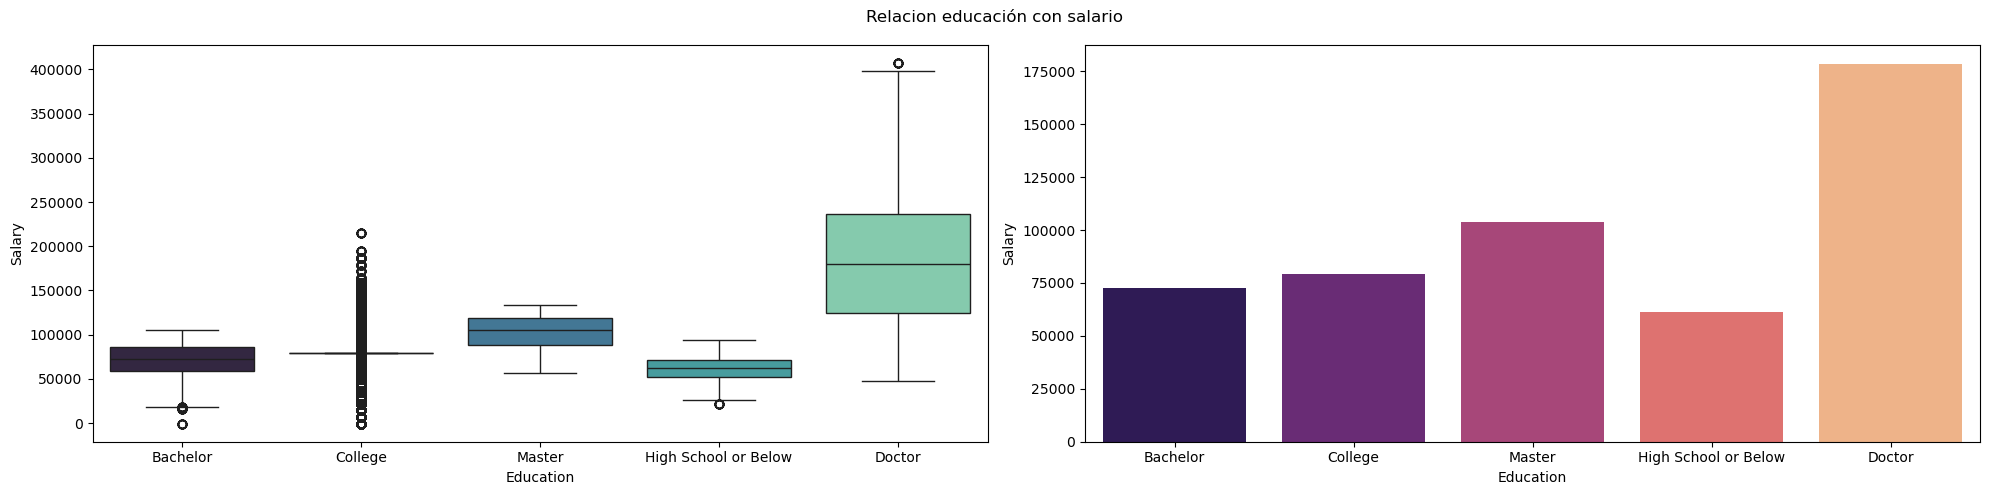

In [100]:
## Para visualizar estamos combinando variable categórica ("education") con numérica ("Salary") --> boxplot o barplot

## Primero boxplot: vemos como se distribuyen todos los valores
## Luego barplot nos devuelve un gráfico donde se observa la relación entre salario (valor medio) y educación de los clientes

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))
sns.boxplot(x = "Education", 
            y = "Salary", 
            data = df_final, 
            ax = axes[0], 
            palette= "mako")

sns.barplot(x = "Education", 
            y = "Salary", 
            data = df_final,
            ci = None,
            ax = axes[1], 
            palette = "magma")
plt.suptitle("Relacion educación con salario")
plt.tight_layout()

INTERPRETACION

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [101]:
## Proporcion --> grafico porcentajes: pie chat
## Recorrer variable tarjetas fidelidad ("Loyalty Card") que es categórica y ver la proporcion de clientes (count) que hay de cada tipo

# -- Pie Chat: preparación de datos groupby + pie
# Primero preparo datos:

tipo_tarjeta_fidelidad = df_final.groupby("Loyalty Card")["Loyalty Number"].count().reset_index()
tipo_tarjeta_fidelidad

,Loyalty Card,Loyalty Number
0,Aurora,82432
1,Nova,136214
2,Star,183266


In [102]:
## Además de ver el total de clientes por tipo de tarjeta, quiero ver el porcentaje en números, antes de visualizarlo. 
# Para ello calculo el total de tarjetas/clientes y veo el porcentaje de cada una

total_tarjeta_fidelidad = tipo_tarjeta_fidelidad["Loyalty Number"].sum()
total_tarjeta_fidelidad

401912

In [103]:
porcentaje_tarjeta_fidelidad = (tipo_tarjeta_fidelidad["Loyalty Number"]/total_tarjeta_fidelidad).round(4)*100
porcentaje_tarjeta_fidelidad.reset_index()

,index,Loyalty Number
0,0,20.51
1,1,33.89
2,2,45.60


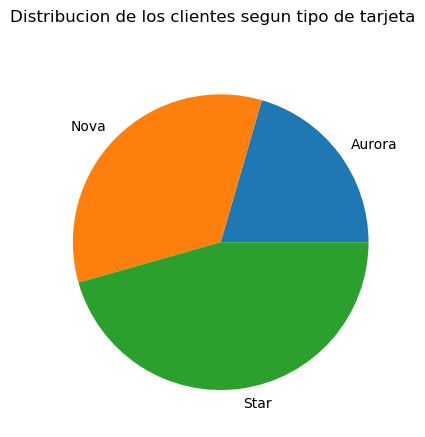

In [104]:
## Ahora aplico Pie Chat para ver como se distribuyen esos resultados:

plt.pie("Loyalty Number", labels= "Loyalty Card", data = tipo_tarjeta_fidelidad)
plt.suptitle("Distribucion de los clientes segun tipo de tarjeta")
plt.show()


Interpretacion: se aprecia que de los tres tipos de tarjeta disponibles casi la mitad de usuarios (el 45,6%) tienen la de categoria Star. El reparto entre las otras dos es algo más parejo, aunque entre ella predomina la tipo Nova.  

6.  ¿Cómo se distribuyen los clientes según su estado civil y género?

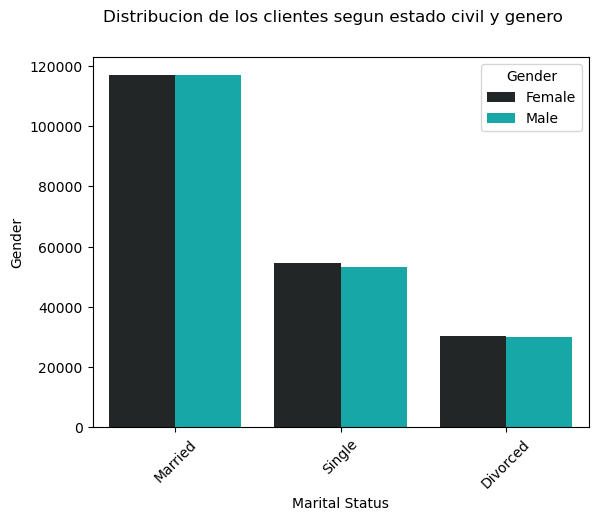

In [105]:
## Tengo que unir estado civil (Marital Status) y genero (Gender), ambas tipo object --> countplot + hue o crosstab

# Gráfico barras (countplot + hue)
estado_civil_genero = df_final['Marital Status'].value_counts().index
sns.countplot(x='Marital Status', data=df_final, color = 'c', order=estado_civil_genero, hue = 'Gender')
plt.xticks(rotation=45)
plt.xlabel("Marital Status")
plt.ylabel("Gender")
plt.suptitle("Distribucion de los clientes segun estado civil y genero")
plt.show()

In [106]:
## A simple vista vemos que la distribucion de os datos parece muy similar en cuanto a genero y estado civil, pero voy a 
# hacer ahora un crosstab, para ver los datos númericos de cada combinación 

crosstab_estado_civil_genero = pd.crosstab(df_final['Marital Status'], df_final['Gender'])
crosstab_estado_civil_genero

Gender,Female,Male
Marital Status,,
Divorced,30380,29968
Married,116910,116996
Single,54584,53074


In [107]:
## Vamos a analizar los porcentajes de datos para mujeres segun estado civil:

datos_mujeres = crosstab_estado_civil_genero["Female"].sum()
print("El dato total de mujeres es:", datos_mujeres, "mujeres")
mujeres_divorciadas = crosstab_estado_civil_genero.iloc[0,0]
porcentaje_mujeres_divorciadas = (mujeres_divorciadas / datos_mujeres).round(3)*100
print("El porcentaje de mujeres divorciadas es:", porcentaje_mujeres_divorciadas)
mujeres_casadas = crosstab_estado_civil_genero.iloc[1,0]
porcentaje_mujeres_casadas = (mujeres_casadas / datos_mujeres).round(3)*100
print("El porcentaje de mujeres casadas es:", porcentaje_mujeres_casadas)
mujeres_solteras = crosstab_estado_civil_genero.iloc[2,0]
porcentaje_mujeres_solteras = (mujeres_solteras / datos_mujeres).round(3)*100
print("El porcentaje de mujeres solteras es:", porcentaje_mujeres_solteras)

El dato total de mujeres es: 201874 mujeres
El porcentaje de mujeres divorciadas es: 15.0
El porcentaje de mujeres casadas es: 57.9
El porcentaje de mujeres solteras es: 27.0


In [108]:
## Ahora hacemos lo mismo con los datos para los hombres:

datos_hombres = crosstab_estado_civil_genero["Male"].sum()
print("El dato total de hombres es:", datos_hombres, "hombres")
hombres_divorciados = crosstab_estado_civil_genero.iloc[0,1]
porcentaje_hombres_divorciados = (hombres_divorciados / datos_hombres).round(3)*100
print("El porcentaje de hombres divorciados es:", porcentaje_hombres_divorciados)
hombres_casados = crosstab_estado_civil_genero.iloc[1,1]
porcentaje_hombres_casados = (hombres_casados / datos_hombres).round(3)*100
print("El porcentaje de hombres casados es:", porcentaje_hombres_casados)
hombres_solteros = crosstab_estado_civil_genero.iloc[2,1]
porcentaje_hombres_solteros = (hombres_solteros / datos_hombres).round(3)*100
print("El porcentaje de hombres solteros es:", porcentaje_hombres_solteros)


El dato total de hombres es: 200038 hombres
El porcentaje de hombres divorciados es: 15.0
El porcentaje de hombres casados es: 58.5
El porcentaje de hombres solteros es: 26.5


Interpretacion: vemos que practicamente el total de datos que tenemos para mujeres y hombres es el mismo (201874 mujeres frente a 200038 hombres), mujeres representa El 50,22% de los datos totales y hombres el 49,77%, esto ayuda para la interpretacion de resultados de las respectivas muestras. 
Si comparamos en función del estado civil vemos que en los tres casos la distibucion es muy similar, en ambos grupos predomina el % de casados (en mujeres representa casi el 58% del total y en hombres el 58,5%) y el grupo menos abudante en amos casos es el de divorciados, con un 15% en ambos casos. 

BONUS Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

1.  Preparación de Datos: Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
2.  Análisis Descriptivo: Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar) del número de vuelos reservados para cada grupo.
3.  Prueba Estadística: Realiza una prueba de hipótesis para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [109]:
reservas_nivel_educativo = df_final.groupby('Education')['Flights Booked'].count()
reservas_nivel_educativo

Education
Bachelor                251398
College                 101848
Doctor                   17606
High School or Below     18822
Master                   12238
Name: Flights Booked, dtype: int64

In [110]:
## Convierto reservas nivel educativo en un df para poder trabajar con el:

reservas_nivel_educativo = reservas_nivel_educativo.to_frame(name='porcentajes_reservas').reset_index().rename(columns={'index': 'var'})
reservas_nivel_educativo

,Education,porcentajes_reservas
0,Bachelor,251398
1,College,101848
2,Doctor,17606
3,High School or Below,18822
4,Master,12238


In [111]:
## Renombro columna del df para que tenga más sentido

reservas_nivel_educativo.rename(columns = {'porcentaje_reservas': 'Total reservas'}, inplace = True)
reservas_nivel_educativo

,Education,porcentajes_reservas
0,Bachelor,251398
1,College,101848
2,Doctor,17606
3,High School or Below,18822
4,Master,12238


In [112]:
reservas_nivel_educativo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Education             5 non-null      object
 1   porcentajes_reservas  5 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 212.0+ bytes


In [113]:
reservas_nivel_educativo.describe().round(2)

,porcentajes_reservas
count,5.00
mean,80382.40
std,102568.67
min,12238.00
25%,17606.00
50%,18822.00
75%,101848.00
max,251398.00


In [115]:
## Renombro la columna "porcentajes_reservas" porque así tiene más sentido

reservas_nivel_educativo.rename(columns = {'porcentajes_reservas': 'Total reservas'}, inplace = True)
reservas_nivel_educativo.head()

,Education,Total reservas
0,Bachelor,251398
1,College,101848
2,Doctor,17606
3,High School or Below,18822
4,Master,12238


In [116]:
total = reservas_nivel_educativo["Total reservas"].sum()
print("El total de reservas de todos los datos agrupados segun niveles educativos es:", total)
media = reservas_nivel_educativo["Total reservas"].mean()
print("La media de reservas en los datos agrupados segun niveles educativos es:", media)
mediana = reservas_nivel_educativo["Total reservas"].median()
print("La mediana de reservas en los datos agrupados segun niveles educativos es:", mediana)
desviacion = reservas_nivel_educativo["Total reservas"].std()
print("La desviacion de reservas en los datos agrupados segun niveles educativos es:", desviacion)

El total de reservas de todos los datos agrupados segun niveles educativos es: 401912
La media de reservas en los datos agrupados segun niveles educativos es: 80382.4
La mediana de reservas en los datos agrupados segun niveles educativos es: 18822.0
La desviacion de reservas en los datos agrupados segun niveles educativos es: 102568.66714937851


In [118]:
## Prueba estadística

##### Pasos
#1. Extracción de muestra de datos --> ya la tengo
#2. Cálculo de métricas: media y std --> ya la tengo
#3. Cálculo de tamaño de muestra --> la calculo
#4. Elección de intervalo de confianza --> 0.95
#5. Aplicación de fórmula para calcular el intervalo de confianza --> lo tengo
#6. Resultado (interpretacion)

In [119]:
muestra = reservas_nivel_educativo["Total reservas"]
longitud = len(df_final["Flights Booked"])

print("La media de la muestra es:", media)
print("La desviación de la muestra es:", desviacion)
print("La longitud de la muestra es:", longitud)
print("El nivel de confiza es: 0,95")

La media de la muestra es: 80382.4
La desviación de la muestra es: 102568.66714937851
La longitud de la muestra es: 401912
El nivel de confiza es: 0,95


In [120]:
confidence_interval = stats.t.interval(
    confidence=0.95,         
    df=longitud-1,             
    loc=media,  
    scale=desviacion / np.sqrt(longitud)  
)

print(f"Media: {media:.2f} reservas")
print(f"Intervalo de Confianza al 95%: {confidence_interval}")

Media: 80382.40 reservas
Intervalo de Confianza al 95%: (80065.29826057132, 80699.50173942867)


In [122]:
## Con un nivel de confianza del 95% Un nivel de confianza del 95% confío en que el proceso de construir intervalos capturará la media verdadera el 95% de las veces.

In [121]:
## Ahora prueba hipótesis. Pasos:

#1. Formulación de hipótesis: H0/H1
#2. Extracción de muestras
#3. Elección de nivel de significancia (alpha): 0.05, 0.10, 0.01
#4. Comprobación de condiciones: normalidad, homogeneidad de varianza, independencia de observaciones.
#5. Selección del estadístico -> Ver apartado "Selección de estadístico"
#6. Toma de decisión: comparación p_value con alpha
#7. Interpretación de resultados

In [123]:
##muestra
reservas_nivel_educativo.head()

,Education,Total reservas
0,Bachelor,251398
1,College,101848
2,Doctor,17606
3,High School or Below,18822
4,Master,12238


In [125]:
## Formulacion hipótesis:
# H0: no existe diferencia significativa en el número de vuelos reservados segun el nivel educativo 
# H1: sí existe diferencia significativa en el número de vuelos reservados segun el nivel educativo

## Extracción de muestras:
muestra

## Nivel de significancia (alpha): 0.05

0    251398
1    101848
2     17606
3     18822
4     12238
Name: Total reservas, dtype: int64

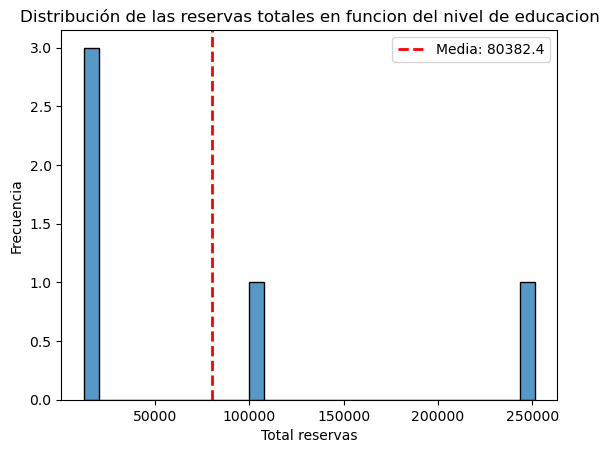

In [127]:
## Comprobacion de condiciones

# Compruebo normalidad en la distribucion de la muestra: primero de forma visual y luego test

# Vemos la distribución de reservas por grupo educativo junto con la media

# Visualización: Histograma con la media
sns.histplot(reservas_nivel_educativo['Total reservas'], bins=30)
plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Media: {media}')
plt.xlabel('Total reservas')
plt.ylabel('Frecuencia')
plt.title('Distribución de las reservas totales en funcion del nivel de educacion')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


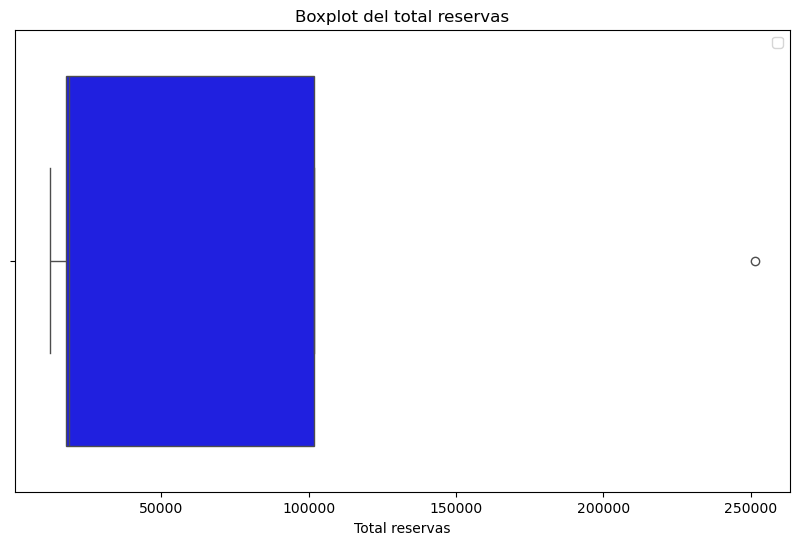

In [140]:
## Ahora veo distribucion de la variable con boxplot

plt.figure(figsize=(10, 6))
sns.boxplot(x = "Total reservas", data = reservas_nivel_educativo, color = "blue")
plt.legend()
plt.title('Boxplot del total reservas')
plt.show()

In [262]:
'''def check_normalidad(data):
    n = longitud
    if n <= 5000:
        test_name = "Shapiro-Wilk"
        stat, p_value = shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        stat, p_value = kstest(data, 'norm')
    if p_value > 0.05:
        decision = "No se rechaza H0: Los datos parecen seguir una distribución normal."
    else:
        decision = "Se rechaza H0: Los datos no siguen una distribución normal."
    return {
        "Prueba": test_name,
        "Estadístico": stat,
        "p-value": p_value,
        "Decisión": decision
    }'''

In [312]:
# Parece apreciarse que la distribucion no sigue forma normal, pero uso funcion para comprobar normalidad

def check_normalidad(data):
    n = len(reservas_nivel_educativo["Total reservas"])
    if n <= 5000:
        test_name = "Shapiro-Wilk"
        stat, p_value = shapiro(data)
    else:
        test_name = "Kolmogorov-Smirnov"
        stat, p_value = kstest(data, 'norm')
    if p_value > 0.05:
        decision = "No se rechaza H0: Los datos parecen seguir una distribución normal."
    else:
        decision = "Se rechaza H0: Los datos no siguen una distribución normal."
    return {
        "Prueba": test_name,
        "Estadístico": stat,
        "p-value": p_value,
        "Decisión": decision
    }

In [311]:
data = reservas_nivel_educativo["Total reservas"]
check_normalidad(data)

{'Prueba': 'Shapiro-Wilk',
 'Estadístico': 0.7638567862603397,
 'p-value': 0.039792850558570264,
 'Decisión': 'Se rechaza H0: Los datos no siguen una distribución normal.'}

In [ ]:
## Al no ser una distribucion normal --> pruebas no parámetricas --> Kruskal porque es varias categorías 

In [ ]:
## Categorias a comparar:

reservas_bachelor = reservas_nivel_educativo[reservas_nivel_educativo["Education"] == "Bachelor"]["Total reservas"]
reservas_college = reservas_nivel_educativo[reservas_nivel_educativo["Education"] == "College"]["Total reservas"]
reservas_doctor = reservas_nivel_educativo[reservas_nivel_educativo["Education"] == "Doctor"]["Total reservas"]
reservas_high = reservas_nivel_educativo[reservas_nivel_educativo["Education"] == 'High School or Below']["Total reservas"]
reservas_master = reservas_nivel_educativo[reservas_nivel_educativo["Education"] == "Master"]["Total reservas"]

In [334]:
## Aplico pruebas No Paramétricas -- Kruskal 

from scipy.stats import kruskal

resultado_kruskal = kruskal(reservas_bachelor, reservas_college, reservas_doctor, reservas_high, reservas_master)
resultado_kruskal

KruskalResult(statistic=4.0, pvalue=0.40600584970983794)

In [335]:
## Interpretacion 

# Si p_value > alpha -> Aceptamos hipótesis nula
# Si p_value < alpha -> Rechazamos hipótesis nula -> Aceptamos la hipótesis alternativa

alpha = 0.05
pvalue = 0.40600584970983794

if pvalue < alpha:
    print("Se rechaza la hipótesis nula H0 -> Se acepta la hipótesis alternativa H1.")
else:
    print("Se acepta la hipótesis nula H0.")

Se acepta la hipótesis nula H0.
